In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
thedir='/glade/scratch/djk2120/dleaf_ens/'
clm5='vary_dleaf_clm5default_h1.nc'
def_ds=xr.open_dataset(thedir+clm5)

In [19]:
ix = np.logical_and(def_ds['time.year']<2015,def_ds['time.month']==6).values
ds2 = def_ds.swap_dims({'time':'mcsec'})
vpd_june_diurnal = ds2['VPD_CAN'][ix].groupby('mcsec').mean(dim=xr.ALL_DIMS)
hh = ds2['mcsec'][ix].groupby('mcsec').mean(dim=xr.ALL_DIMS)
ixhh = vpd_june_diurnal==np.max(vpd_june_diurnal)
hhmax = hh[ixhh]
hhmax
ix1 = def_ds['time.year']<2015
ix2 = (def_ds['mcsec']==hhmax).values.ravel()
ix  = np.logical_and(ix1,ix2)
vpdcan_midday_monthly=(def_ds['VPD_CAN'][ix]).groupby('time.month').mean(dim=xr.ALL_DIMS)

In [3]:
ens = 1+np.arange(10)
paths = [thedir+"vary_dleaf_"+str(ee).zfill(4)+'_h1.nc' for ee in ens]
ds = xr.open_mfdataset(paths,combine='nested',concat_dim='ens')
ds['ens']=ens

array(1.009698, dtype=float32)

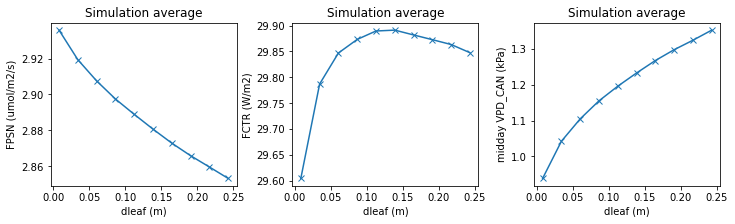

In [54]:
ix = def_ds['time.year']<2015
plt.figure(figsize=[12,3])
fpsn_ann_avg = ds['FPSN'][:,ix].groupby('ens').mean(dim=xr.ALL_DIMS)
fctr_ann_avg = ds['FCTR'][:,ix].groupby('ens').mean(dim=xr.ALL_DIMS)
ix1 = (def_ds['mcsec']==hhmax).values.ravel()
ix2 = def_ds['time.year']<2015
ix  = np.logical_and(ix1,ix2)
vpd_ann_avg = ds['VPD_CAN'][:,ix].groupby('ens').mean(dim=xr.ALL_DIMS)

dleaf = np.linspace(0.0081,0.243,10)
plt.subplot(131)
plt.plot(dleaf,fpsn_ann_avg,'-x')
plt.xlabel('dleaf (m)')
plt.ylabel('FPSN (umol/m2/s)')
plt.title('Simulation average')
plt.subplot(132)
plt.plot(dleaf,fctr_ann_avg,'-x')
plt.xlabel('dleaf (m)')
plt.ylabel('FCTR (W/m2)')
plt.subplots_adjust(wspace=0.3)
plt.title('Simulation average');
plt.subplot(133)
plt.plot(dleaf,vpd_ann_avg,'-x')
plt.xlabel('dleaf (m)')
plt.ylabel('midday VPD_CAN (kPa)')
plt.subplots_adjust(wspace=0.3)
plt.title('Simulation average');

(np.max(fpsn_ann_avg)/np.min(fpsn_ann_avg)).values
(np.max(fctr_ann_avg)/np.min(fctr_ann_avg)).values


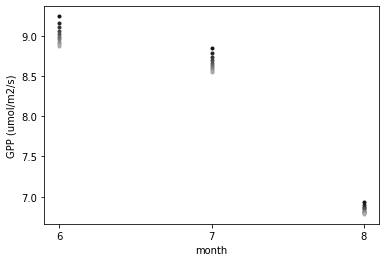

In [28]:
ix = np.logical_and(ds['time.month']>5,ds['time.month']<9)

for ee in ens:
    y = ds['FPSN'].sel(ens=ee)[ix].groupby('time.month').mean(dim=xr.ALL_DIMS)
    plt.plot(6+np.arange(3),y,'.',color=ee/15*np.ones(3))
plt.xlabel('month')
plt.ylabel('GPP (umol/m2/s)')
plt.xticks(6+np.arange(3));

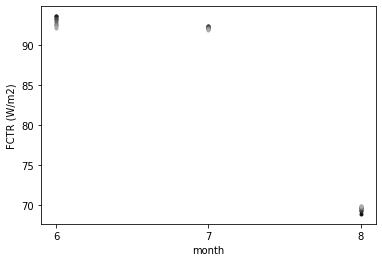

In [27]:
ix = np.logical_and(ds['time.month']>5,ds['time.month']<9)

for ee in ens:
    y = ds['FCTR'].sel(ens=ee)[ix].groupby('time.month').mean(dim=xr.ALL_DIMS)
    plt.plot(6+np.arange(3),y,'.',color=ee/15*np.ones(3))
plt.xlabel('month')
plt.ylabel('FCTR (W/m2)')
plt.xticks(6+np.arange(3));

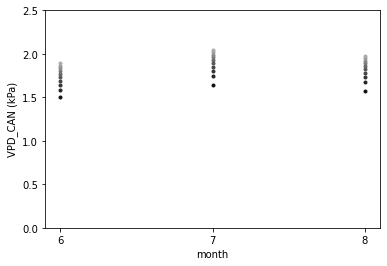

In [26]:
ix1 = (def_ds['mcsec']==hhmax).values.ravel()
ix2 = np.logical_and(ds['time.month']>5,ds['time.month']<9)
ix  = np.logical_and(ix1,ix2)

for ee in ens:
    y = ds['VPD_CAN'].sel(ens=ee)[ix].groupby('time.month').mean(dim=xr.ALL_DIMS)
    plt.plot(6+np.arange(3),y,'.',color=ee/15*np.ones(3))
plt.xlabel('month')
plt.ylabel('VPD_CAN (kPa)')
plt.xticks(6+np.arange(3));
plt.ylim([0,2.5]);